# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print(url)

In [ ]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Start the call counter 
record = 0
set_number = 1
skip = 0
# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:
    if (record > 0) and ((record % 50) == 0):
        set_number += 1
        record += 1
    else:

        try: 
            response = requests.get(f"{url}&q={city}").json() 
            city_name.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            max_temp.append(response["main"]["temp_max"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            wind_speed.append(response["wind"]["speed"])
            city_record = response["name"]
            print(f"Processing Record {record:03d} of Set {set_number:02d} | {city_record}")
            record += 1
        
        # If no record found "skip" to next call
        except:
            print("City not found. Skipping...")
            skip += 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

weather_df = pd.DataFrame(weather_dict)
weather_df.sort_values(by=['City'])
weather_df.reset_index(drop=True)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,New Norfolk,0,AU,1673845597,35,-42.7826,147.0587,70.92,5.01
1,Marabá,100,BR,1673845598,100,-5.3686,-49.1178,73.58,3.44
2,Thanh Hoa,100,VN,1673845598,51,19.8000,105.7667,56.21,6.58
3,Pangnirtung,81,CA,1673845599,89,66.1451,-65.7125,-42.18,5.55
4,Hobart,20,AU,1673845599,50,-42.8794,147.3294,71.28,12.66
...,...,...,...,...,...,...,...,...,...
542,Novochernorechenskiy,100,RU,1673845845,91,56.2669,91.0828,9.90,11.54
543,Beringovskiy,100,RU,1673845846,93,63.0500,179.3167,-5.80,18.39
544,Pemagatsel,97,BT,1673845846,83,27.0319,91.4266,46.60,3.11
545,Manokwari,100,ID,1673845846,71,-0.8667,134.0833,83.26,7.27


In [21]:
# save data frame
weather_df.to_csv("data.csv", sep='\t', encoding='utf-8')


In [22]:
modified_weather_df = weather_df.describe()
modified_weather_df

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,547.000000,5.470000e+02,547.000000,547.000000,547.00000,547.000000,547.000000
mean,59.872029,1.673846e+09,73.967093,20.118262,21.76824,48.443656,8.310420
std,39.246545,9.570426e+01,20.542880,33.493524,90.26198,32.940990,6.140922
min,0.000000,1.673845e+09,2.000000,-54.800000,-175.20000,-58.720000,0.000000
25%,20.000000,1.673846e+09,65.000000,-6.214950,-60.52970,31.145000,3.750000
50%,75.000000,1.673846e+09,78.000000,25.050000,27.99530,56.080000,6.710000
75%,100.000000,1.673846e+09,90.000000,47.739150,100.47585,74.020000,11.500000
max,100.000000,1.673846e+09,100.000000,78.218600,179.31670,99.390000,42.010000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
clean_weather_df = weather_df.loc[(weather_df['Humidity'] < 100), :]
not_clean_weather_df = weather_df.loc[(weather_df['Humidity'] > 100), :]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

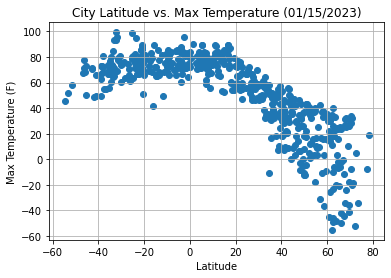

In [38]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Max Temp'], marker = "o")

plt.title("City Latitude vs. Max Temperature (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

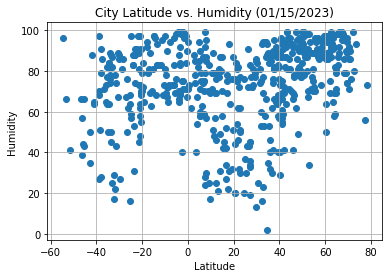

In [39]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Humidity'], marker = "o")

plt.title("City Latitude vs. Humidity (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.show()

## Latitude vs. Cloudiness Plot

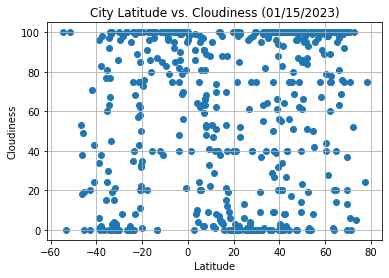

In [40]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Cloudiness'], marker = "o")

plt.title("City Latitude vs. Cloudiness (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.show()

## Latitude vs. Wind Speed Plot

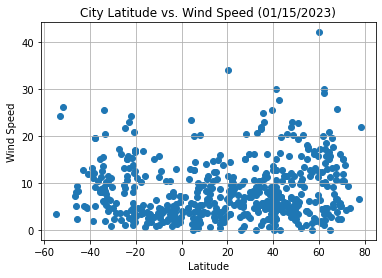

In [41]:
plt.scatter(clean_weather_df['Lat'], clean_weather_df['Wind Speed'], marker = "o")

plt.title("City Latitude vs. Wind Speed (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.show()

## Linear Regression

In [42]:
north = weather_df.loc[(weather_df["Lat"] >= 0), :]
south = weather_df.loc[(weather_df["Lat"] < 0), :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

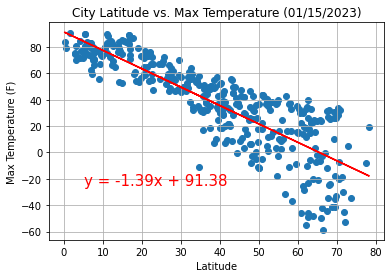

In [52]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north['Max Temp'])
regress_values = (north["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(north["Lat"], north['Max Temp'], marker = "o")

plt.title("City Latitude vs. Max Temperature (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
                                                           
plt.plot(north["Lat"], regress_values, "r-")
plt.annotate(line_eq, (5, -25), fontsize = 15, color = "red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3267416645780293


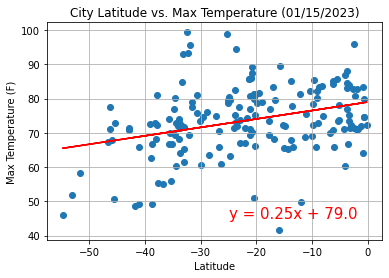

In [55]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south['Max Temp'])
regress_values = (south["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(south["Lat"], south['Max Temp'], marker = "o")

plt.title("City Latitude vs. Max Temperature (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
                                                           
plt.plot(south["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-25, 45), fontsize = 15, color = "red")


plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.43976958760387025


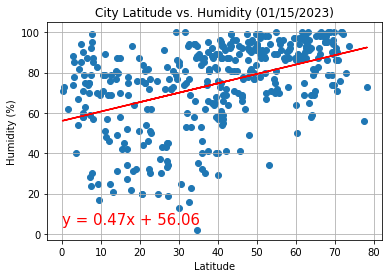

In [57]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north['Humidity'])
regress_values = (north["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(north["Lat"], north['Humidity'], marker = "o")

plt.title("City Latitude vs. Humidity (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
                                                           
plt.plot(north["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 5), fontsize = 15, color = "red")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.36804143286912006


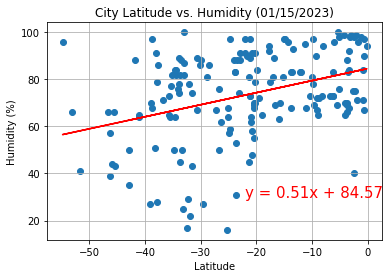

In [64]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south['Humidity'])
regress_values = (south["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(south["Lat"], south['Humidity'], marker = "o")

plt.title("City Latitude vs. Humidity (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
                                                           
plt.plot(south["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-22, 30), fontsize = 15, color = "red")


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.29375732831381063


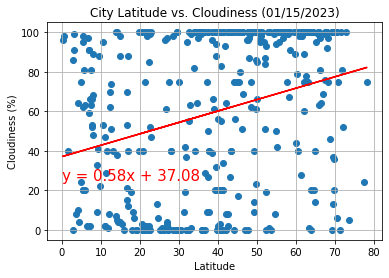

In [66]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north['Cloudiness'])
regress_values = (north["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(north["Lat"], north['Cloudiness'], marker = "o")

plt.title("City Latitude vs. Cloudiness (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
                                                           
plt.plot(north["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 25), fontsize = 15, color = "red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.4812063091304617


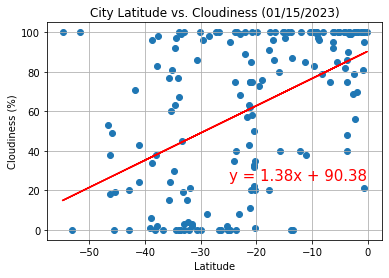

In [70]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south['Cloudiness'])
regress_values = (south["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(south["Lat"], south['Cloudiness'], marker = "o")

plt.title("City Latitude vs. Cloudiness (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
                                                           
plt.plot(south["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-25, 25), fontsize = 15, color = "red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15993831518715865


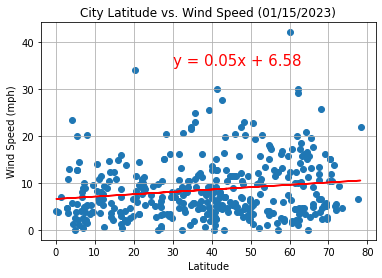

In [72]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north['Wind Speed'])
regress_values = (north["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(north["Lat"], north['Wind Speed'], marker = "o")

plt.title("City Latitude vs. Wind Speed (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
                                                           
plt.plot(north["Lat"], regress_values, "r-")
plt.annotate(line_eq, (30,35), fontsize = 15, color = "red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3694746649118061


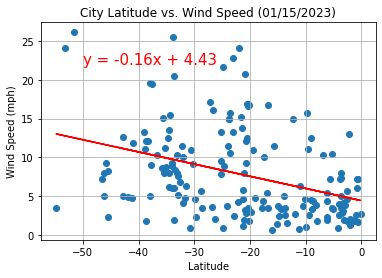

In [74]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south['Wind Speed'])
regress_values = (south["Lat"] * slope) + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

print(f"The r-value is: {rvalue}")

plt.scatter(south["Lat"], south['Wind Speed'], marker = "o")

plt.title("City Latitude vs. Wind Speed (01/15/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
                                                           
plt.plot(south["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-50,22), fontsize = 15, color = "red")

plt.show()